In [9]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import math
import numpy as np
#import colorsys
#from scipy import optimize as sciopt
#import os
import lmfit
#import uncertainties as u
import dataset as ds
import datasetXtals as dsX
import fit_functions as funcs
import importlib

In [10]:
plt.style.use(hep.style.ATLAS)
plt.style.use({"axes.labelsize":'36', 'lines.linewidth':'2', 'lines.markersize':'2', 'xtick.labelsize':'16'})

In [ ]:
# Reload stuff in case you make changes!

importlib.reload(ds)
importlib.reload(dsX)
importlib.reload(funcs)

In [42]:
#global_energy_lim = [0, 100]
global_set_name = '1C'
global_calo_num = 7

names = ['1A', '1B', '1C', '1D', '2C']
calo_nums = np.arange(1, 25, 1)
#fit_lim = [30, 300]
version = "3"

#energy_lim = [300, 1000]
#low_E  = str(energy_lim[0] / 1000)
#high_E = str(energy_lim[1] / 1000)

datasets = {"1A": ["60h", r.TFile("./data/60hXtalsPosition_v"+version+".root")],
            "1B": ["HighKick", r.TFile("./data/highKickXtalsPosition_v"+version+".root")],
            "1C": ["9day", r.TFile("./data/9dayXtalsPosition_v"+version+".root")],
            "1D": ["EndGame", r.TFile("./data/endGameXtalsPosition_v"+version+".root")],
            "2C": ["run2C", r.TFile("./data/run2CXtalsPosition_v"+version+".root")]}

In [46]:
#for global_set_name in names:
#    if(global_set_name == '1D'):
#        fit_lim = [50, 300]
#    else:
#        fit_lim = [30, 300]
#    for global_calo_num in calo_nums:
#        for eLow in range(0, 100, 100):
            #energy_lim = [eLow, eLow+100]
energy_lim = [1000, 3200]
this_low_E  = str(energy_lim[0] / 1000)
this_high_E = str(energy_lim[1] / 1000)

#dataset = dsX.DataSetX(global_set_name,
#                       datasets[global_set_name][0],
#                       datasets[global_set_name][1],
#                       energy_lim)
#dataset.set_up_one_calo(step_length=10, caloNum=global_calo_num, verbose=False)
#dataset.calos[global_calo_num].data['randomized'].to_csv("./calo_data_csvs/"+global_set_name+"_calo_"+str(global_calo_num)+"_"+this_low_E+"-"+this_high_E+"_GeV_v"+version+".csv")
graph_it_up(this_low_E, this_high_E, global_set_name, global_calo_num, fit_lim)

In [44]:
def graph_it_up(low_E, high_E, global_set_name, global_calo_num, fit_lim):

    model = lmfit.Model(funcs.func0)


    dataX = pd.read_csv("./calo_data_csvs/"+global_set_name+"_calo_"+str(global_calo_num)+"_"+low_E+"-"+high_E+"_GeV_v"+version+".csv")

    fit_data = dataX[(dataX['TimeBin'] > fit_lim[0]) & (dataX['TimeBin'] < fit_lim[1]) ][:]


    model.set_param_hint('c', min=0, max=50)
    model.set_param_hint('m', min=-1, max=1)


    result = model.fit(fit_data['RMS'], t=fit_data['TimeBin'],
                        c=35, m=0,
                       weights=1/fit_data['RMSError'])
    #cov = result.covar

    #print(result.fit_report())

    #time = np.linspace(fit_lim[0],fit_lim[1],100)
    #guess = funcs.func0(t=time, c=35, m=0)

    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(20,10)


    ax.errorbar(dataX['TimeBin'], dataX['RMS'], yerr=dataX['RMSError'], color='xkcd:grey', linestyle='none')
    ax.plot(dataX['TimeBin'], dataX['RMS'], linestyle='none', marker='o', markersize=2, label='y')
    ax.plot(fit_data['TimeBin'], result.best_fit, label='fit')
    #ax.plot(time, guess, label='guess')
    ax.grid()

    ax.set_ylabel('y-RMS    [mm]')
    ax.set_xlabel('Time     [μs]')
    
    ax.set_title(global_set_name + " Calorimeter " + str(global_calo_num) + " Crystal y-RMS with Cluster Energy Cut "+ low_E + "-" + high_E, fontsize=40)

    ax.legend(loc=0)
    
    plt.savefig("./images/single_calos/"+global_set_name+"_calo_"+str(global_calo_num)+"_"+low_E+"-"+high_E+"_GeV_v"+version+"_uncut.png", bbox_inches='tight')
    
    ax.set_ylim(32, 34)

    plt.savefig("./images/"+global_set_name+"_calo_"+str(global_calo_num)+"_"+low_E+"-"+high_E+"_GeV_v"+version+"_cut.png", bbox_inches='tight')
    #plt.savefig('slide6RMSPlot.png')
    plt.close()

In [ ]:
f = r.TFile("./data/run2CXtalsPosition_v"+version+".root")
f.ls()

In [ ]:
global_set_name  = '2C'
global_calo_num = 7
graph_it_up("0", "1000")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


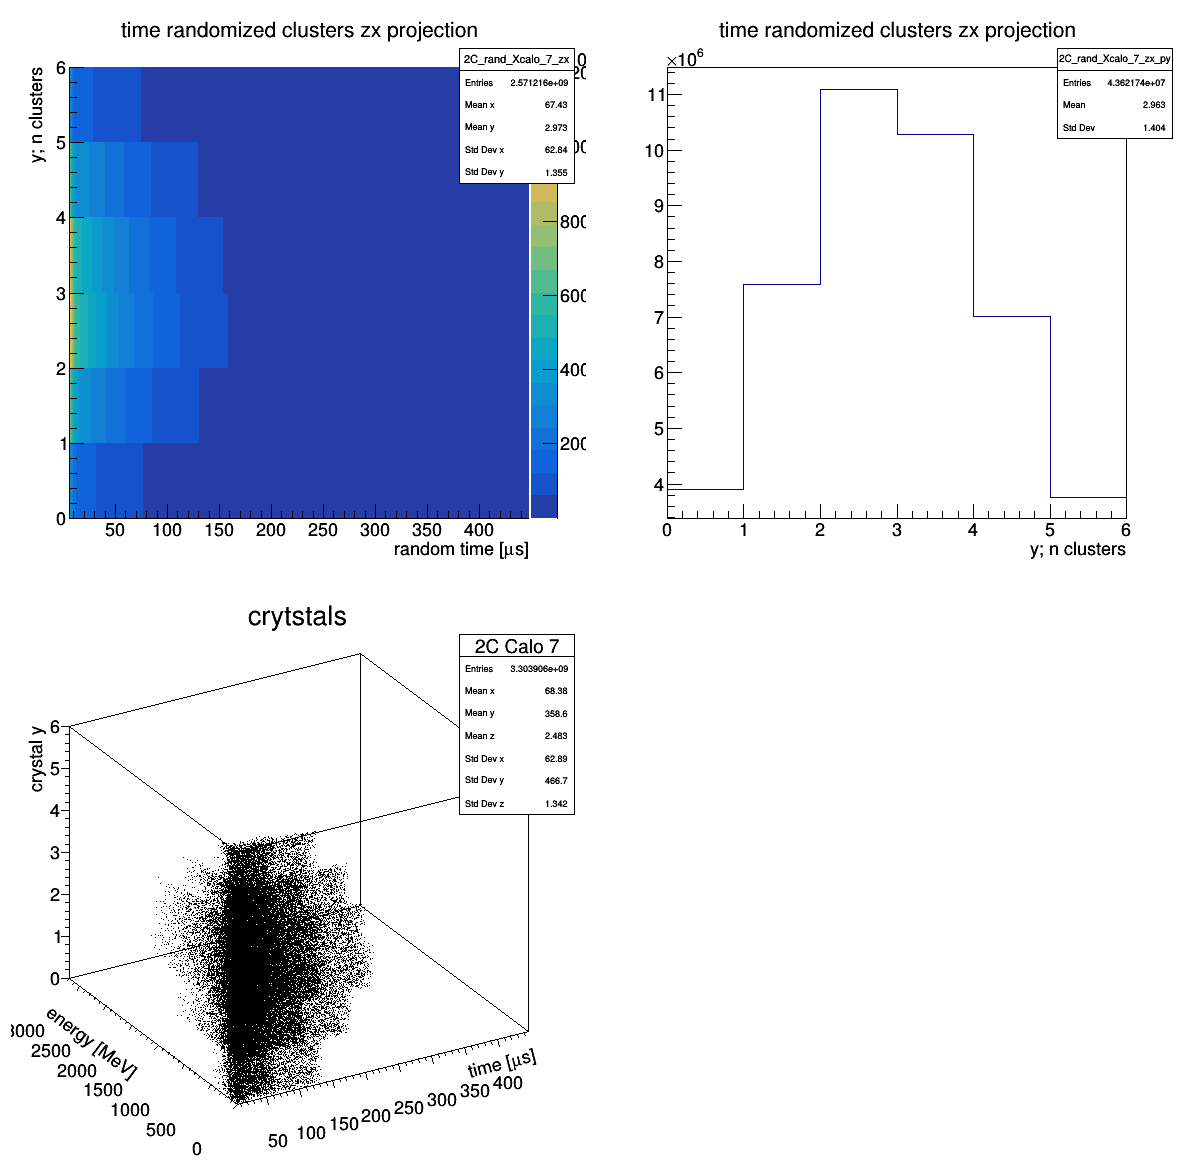

In [32]:
f = r.TFile("./data/run2CXtalsPosition_v"+version+".root")
bruh = f.Get("verticalPosition/xtals7").Clone("2C Calo 7")
        

dataset = dsX.DataSetX("2C",
                                   datasets["2C"][0],
                                   datasets["2C"][1],
                                   [0, 1000])
dataset.set_up_one_calo(step_length=10, caloNum=7, verbose=False)
hist = dataset.calos[7].hists['randomized']
proj = hist.ProjectionY("_py", 20, 30)

c = r.TCanvas("c", "c", 1200, 1200)
c.Divide(2, 2)
c.cd(1)
hist.Draw("colz")
c.cd(2)
proj.Draw()
c.cd(3)
bruh.GetXaxis().SetLabelOffset(0.05)
bruh.GetYaxis().SetLabelOffset(0.07)
bruh.SetZTitle("crystal y")
bruh.Draw()

c.Draw()